# Titanic part 1
Check out the Kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted

Note: A kaggle account is a must in order to access the data.

Download the train.csv file.

In [1]:
# open the data with pandas
# import standard libraries to work with
import pandas as pd
from pandas import Series,DataFrame


In [2]:
# set up the Titanic csv file as a DataFrame
titanic_df = pd.read_csv('train.csv')

In [3]:
# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
# grab information of the dataframe
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Understanding the columns
    PassengerId - Index for each passenger

    Survived - whether the passenger survived the sinking or not.
             - (0 = No ; 1 = Yes)

    Pclass - different Passenger classes Titanic.

    Name - name of the passenger

    Sex - gender of the passenger

    Age - age of the passenger

    SibSp - Number of Siblings/Spouses the passenger had on board.

    Parch - Number of Parents/Children the passenger had on board.

    Ticket - ticket number

    Fare - Passenger fare

    Cabin - the cabin. The first letter in the cabin stands for the deck(A,B,C,D,E,F,G)decks. *N/B* A lot of cabin data is missing.

    Embarked - (S,C,Q) stand for the cities or ports of Embarkation

             - (C = Cherbourg; Q = Queenstown, S = Southampton)

### Some questions to ask in analysing the titanic dataset

All good data analysis projects start with trying to answer questions. We already know what column category data we have. Let's think of some questions or insights we would like to obtain from the data. Here are a few questions we will try to answer using data analysis skills.

First some basic questions:

    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then we dig deeper with a broader question:

    5.) What factors helped one survive the sinking?

##### Let's start with the first question. Who were the passengers in the Titanic?

In [6]:
# import numpy and vizualization libraries to use
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# command to see the plots in the ipython notebook
%matplotlib inline

C:\Users\BEN KOLE\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


C:\Users\BEN KOLE\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


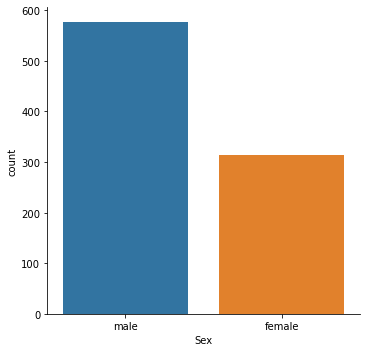

In [7]:
# we want to know who were the passengers
# we will do a factor plot on sex columns to have an overview of the gender on board
sns.factorplot('Sex',data=titanic_df,kind='count')

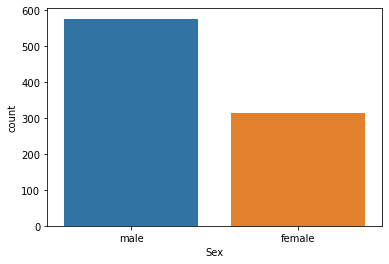

In [8]:
# alternatively
sns.countplot(x='Sex',data=titanic_df)

There were many many more males than females in the Titanic,with the number of males being almost twice that of females. Interesting!

Let's now separate the gender by classes.

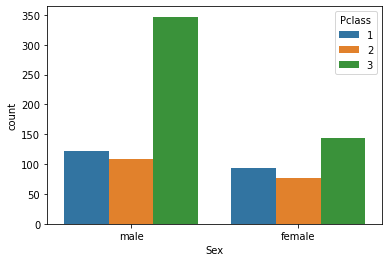

In [9]:
sns.countplot(x='Sex',data=titanic_df,hue='Pclass')

We can see that for each gender category,the highest number of passengers was recorded in the 3rd Class,followed by the 1st Class,and the 2nd Class had the lowest number of passengers for both male and female. 

Similarly,we can check the gender distribution on each class.

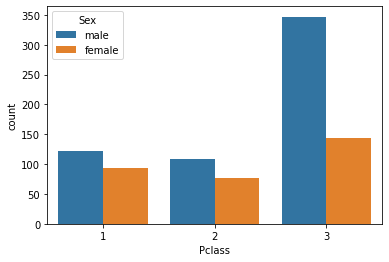

In [10]:
sns.countplot(x='Pclass',data=titanic_df,hue='Sex')

It's clear that:
    
    * in each Class there were more males than females.
    * the 1st and the 2nd classes had an even distribution of the genders.
    * in the 3rd Class,the ratio of male to female was almost 2:1

It might be interesting knowing the split between male adults,female adults and children. We will use the apply technique to create a function to do this!

In [11]:
# create a function for the split between male,female and children
def male_female_child(passenger):
    age,sex = passenger
    
    # we will define a child as anybody less than 16 years old
    if age < 16:
        return 'child'
    else:
        return sex

We will create a new column called 'person' on our dataframe and apply our function on that column.

In [12]:
# apply the function along the new column
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [13]:
# preview the dataframe with the new column
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


We can now check how the persons are distributed in each class.

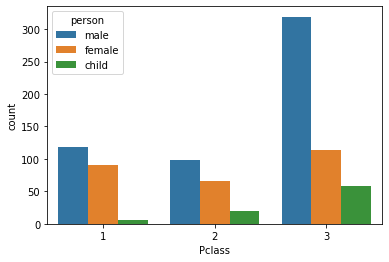

In [14]:
# do a countplot
sns.countplot(x='Pclass',data=titanic_df,hue='person')

Now we can see that,there was the highest number of children in the 3rd class and the least in the 1st class!.

To get a more precised picture on the distribution of ages,we will do a histogram.

C:\Users\BEN KOLE\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\BEN KOLE\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([14., 10.,  6., 10.,  7.,  3.,  4.,  8.,  2.,  4.,  1.,  8.,  6.,
        17., 13., 26., 25., 16., 51., 15., 31., 24., 18., 18., 27., 20.,
        44., 18., 17., 16., 18., 23.,  6., 25., 13.,  8., 13.,  5.,  9.,
        14., 12.,  9.,  6., 10.,  7.,  6.,  1.,  8.,  7.,  2.,  5.,  2.,
         4.,  3.,  4.,  4.,  3.,  1.,  0.,  0.,  0.,  3.,  2.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.]),
 array([ 0.42      ,  1.55685714,  2.69371429,  3.83057143,  4.96742857,
         6.10428571,  7.24114286,  8.378     ,  9.51485714, 10.65171429,
        11.78857143, 12.92542857, 14.06228571, 15.19914286, 16.336     ,
        17.47285714, 18.60971429, 19.74657143, 20.88342857, 22.02028571,
        23.15714286, 24.294     , 25.43085714, 26.56771429, 27.70457143,
        28.84142857, 29.97828571, 31.11514286, 32.252     , 33.38885714,
        34.52571429, 35.66257143, 36.79942857, 37.93628571, 39.07314286,
        40.21      , 41.34685714, 42.48371429, 43.62057143, 44.75742857,
        45.89428

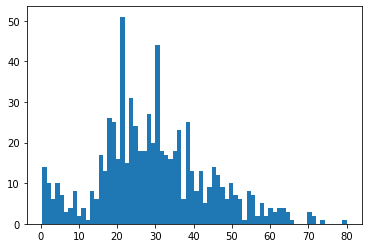

In [15]:
plt.hist(x='Age',data=titanic_df,bins=70)

In [16]:
titanic_df['Age'].max()

80.0

In [17]:
titanic_df['Age'].min()

0.42

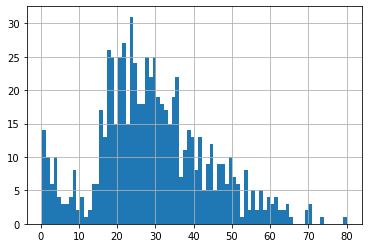

In [18]:
# similarly,we can do a quick histogram
titanic_df['Age'].hist(bins=80)

It looks like there were many people in the Titanic aged around 30.

In [19]:
titanic_df['Age'].median()

28.0

In [20]:
titanic_df['Age'].mean()

29.69911764705882

We can do a comparison of the males,females and children.

In [21]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

Now we know how many males,females and children were in the Titanic.

# Titanic part 2

More vizualizations on our dataframe:

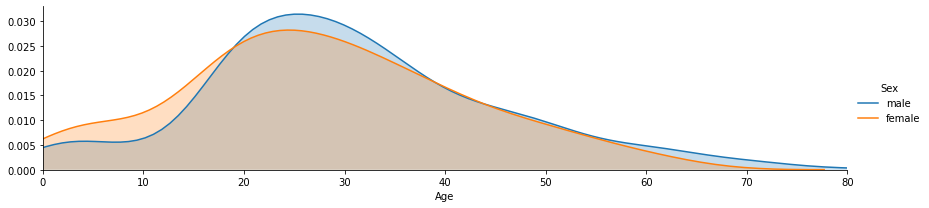

In [22]:
# multiple kde(kernel density estimate) plots with FacetGrid
# FacetGrid makes it possible to draw multiple plots on one figure
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

# use map to plot all the possible kde plots for the age column
fig.map(sns.kdeplot,'Age',shade=True)

# set x-limit by the oldest passenger
oldest = titanic_df['Age'].max()

# set the x-limits considering age can not be negative
fig.set(xlim=(0,oldest))

# manually add a legend
fig.add_legend()

Now we have multiple kernel density estimate (kde) plots showing the distribution of the ages of the passengers across both genders in the titanic. 

We can also include the children and show the distribution of their ages.

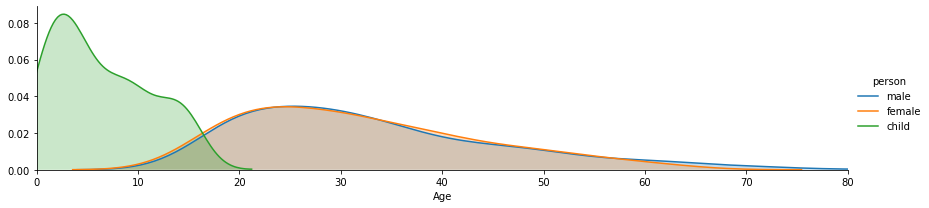

In [23]:
# make a figure using FacetGrid
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)

# map kde plots on the figure for the age column
fig.map(sns.kdeplot,'Age',shade=True)

# set the x-limit by the oldest passenger
oldest = titanic_df['Age'].max()

# set the x-limits considering age is non-negative
fig.set(xlim=(0,oldest))

# manually add a legend for the figure
fig.add_legend()

Now,in the above figure we have included the age distribution for the children.

Similarly,we can show the age distribution for the classes.

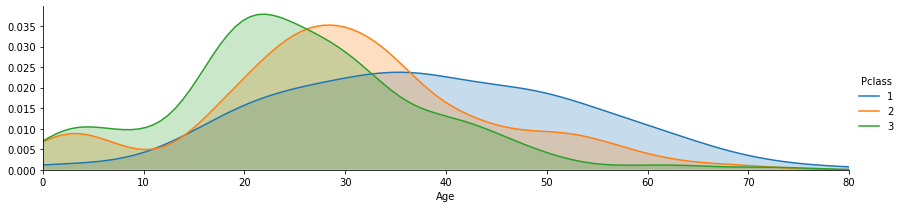

In [24]:
# make a figure using FacetGrid
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

# map kde plots on the figure for the age column
fig.map(sns.kdeplot,'Age',shade=True)

# set the x-limit by the oldest passenger
oldest = titanic_df['Age'].max()

# set the x-limits considering age is non-negative
fig.set(xlim=(0,oldest))

# manually add a legend for the figure
fig.add_legend()

From the above plot:
    
    * the 1st class follows a normal distribution.
    * however,for the 2nd and 3rd classes,the ages are skewed towards the 20 to 30 range.
    
So far,we are done looking at who the passengers were based on their ages,sex and classes.

##### We will now look at the second question, What deck were the passengers on and how does that relate to their class?

In [25]:
# preview the data again
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


To get information on the deck,we will analyze the cabin column. Note that the cabin column has lots of null values which must be dropped before analysis.

In [26]:
# make a new object called deck
deck = titanic_df['Cabin'].dropna()

In [27]:
# preview the decks
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

We only need the first letter of the deck to classify its level, i.e for example A,B,C,D,E,F and G

In [28]:
# grab the first letters using a for loop
levels = []

for level in deck:
    levels.append(level[0])

In [29]:
# preview an array of the first letters in the decks
np.array(levels)

array(['C', 'C', 'E', 'G', 'C', 'D', 'A', 'C', 'B', 'D', 'B', 'C', 'B',
       'C', 'F', 'F', 'C', 'E', 'A', 'D', 'D', 'C', 'B', 'E', 'D', 'F',
       'D', 'C', 'B', 'F', 'C', 'E', 'B', 'A', 'C', 'F', 'A', 'F', 'B',
       'B', 'G', 'A', 'D', 'D', 'C', 'C', 'C', 'D', 'G', 'C', 'B', 'E',
       'B', 'C', 'C', 'C', 'D', 'A', 'B', 'D', 'C', 'C', 'B', 'E', 'C',
       'C', 'E', 'C', 'B', 'C', 'E', 'C', 'D', 'B', 'C', 'C', 'C', 'E',
       'T', 'F', 'C', 'F', 'C', 'E', 'D', 'B', 'E', 'C', 'B', 'D', 'G',
       'C', 'E', 'C', 'E', 'B', 'C', 'A', 'C', 'C', 'C', 'E', 'D', 'E',
       'E', 'D', 'A', 'B', 'C', 'B', 'C', 'D', 'C', 'B', 'C', 'E', 'D',
       'F', 'B', 'B', 'C', 'B', 'B', 'B', 'C', 'C', 'A', 'E', 'C', 'E',
       'E', 'C', 'A', 'E', 'B', 'D', 'A', 'C', 'F', 'D', 'D', 'D', 'A',
       'B', 'B', 'D', 'A', 'D', 'E', 'C', 'B', 'B', 'D', 'B', 'B', 'C',
       'F', 'C', 'E', 'E', 'C', 'C', 'C', 'F', 'C', 'E', 'E', 'B', 'B',
       'D', 'C', 'B', 'B', 'D', 'E', 'B', 'B', 'D', 'E', 'F', 'B

In [30]:
# make a dataframe of the decks
cabin_df = DataFrame(levels,columns=['Cabin'])

cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


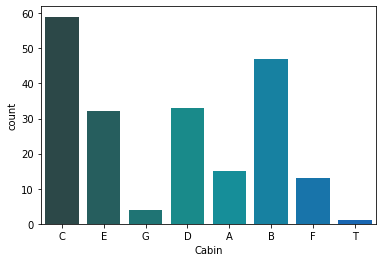

In [31]:
 # create a count plot for the decks
sns.countplot(x='Cabin',data=cabin_df,palette='winter_d')

Below is a link for color maps:

http://matplotlib.org/users/colormaps.html

In [32]:
cabin_df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

From the above plot,we notice that there is a 'T' cabin at the very end. And it looks like it does not make any sense (it's an outlier). We can get rid of it.

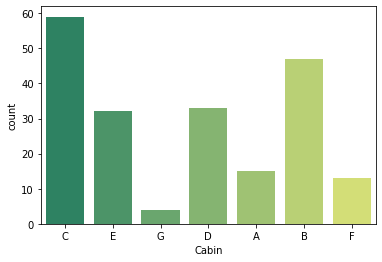

In [33]:
# redefine the cabin dataframe without the 'T' value
cabin_df = cabin_df[cabin_df.Cabin != 'T']

# a factor plot of the decks without the 'T' value
sns.countplot(x='Cabin',data=cabin_df,palette='summer')

In [34]:
# preview the titanic data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


##### Let's look at the third question, Where did the passengers come from?
Our focus will be on the 'Embarked' column which shows the cities.

Remember, (C = Cherbourg; Q = Queenstown, S = Southampton)

We can do a countplot to look at the split of the passengers based on where they come from.

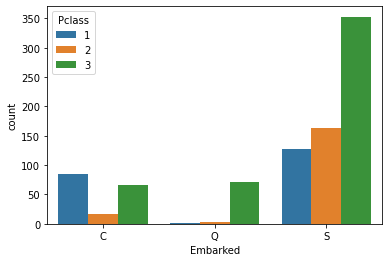

In [35]:
# a countplot for the 'Embarked' column
# classify by class
sns.countplot(x='Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

From the above plot we can see that:
    
    * In Queenstown,most people boarded the 3rd class in the Titanic,and very few boarded the 1st and 2nd classes.
    * In Cherbourg,most people boarded the 1st class,followed by the 3rd class and few people boarded the 2nd class.
    * In Southampton,most people boarded the 3rd class,there were still more people in the 2nd class and few people in the 1st class. Somehow,the number of passengers was evenly distributed across all the classes in Southampton city.
    
The above information is important in that it can prompt us further into looking at the economies of the cities at the time of the travel of the Titanic.

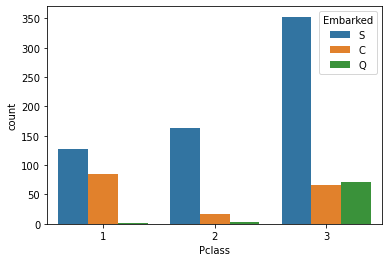

In [36]:
# alternatively
sns.countplot(x='Pclass',data=titanic_df,hue='Embarked')

Looking at the above plot we can also deduct that:

    * In the 1st class,most passengers came from Southampton,followed by Cherbourg and almost none came from Queenstown.
    * In the 2nd class still,most passengers came from Southampton,followed by Cherbourg and very very few from Queenstown.
    * In the 3rd class,most passengers came from Southampton,and the rest of the passengers were evenly distributed between Cherbourg and Queenstowncities.  
    
From a general overview we can assume that at the time the passengers boarded the Titanic,Cherbourg and Southampton cities had stronger economies than Queenstown city.

# Titanic part 3

In this part of our analysis on the Titanic dataset,we will look  at the fourth question:

##### Who was alone and who was with family?

To do this,we will create a new column on our dataframe to define what alone means.

In [37]:
# let's preview the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Looking at our dataframe again,there are two columns which are of interest in answering our fourth question i.e the 'SibSp' and 'Parch' columns.

*Recall*:

*The 'SibSp' column indicates the number of Siblings/Spouses the passenger had on board.*

*On the other hand, the 'Parch' column indicates the number of Parents/Children the passenger had on board.*

Therefore,if the passenger has 0 for both 'SibSp' and 'Parch' columns,that means they are alone. 

In [38]:
# create a column to define who was alone
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [39]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [41]:
# redefine the 'Alone' column
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\BEN KOLE\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [42]:
# For more information on the above warning
url = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

In [43]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Let's see visual representation of who was with the family and who was alone.

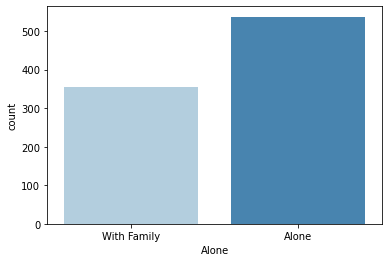

In [44]:
# countplot on the 'Alone' column
sns.countplot('Alone',data=titanic_df,palette='Blues')

From the plot,it looks like quite more people in the Titanic were alone,in comparison to those who were with family members.

Having done that,we will look at the fifth question,which is somehow the most interesting question to answer:

##### What factors helped one survive the sinking of the Titanic?

Before we look into the factors,we will have a picture of survival of the passengers during the sinking or crushing of the Titanic.

In [47]:
# create a survivor column using map method
titanic_df['Survivor'] = titanic_df.Survived.map({0:'No',1:'Yes'})

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


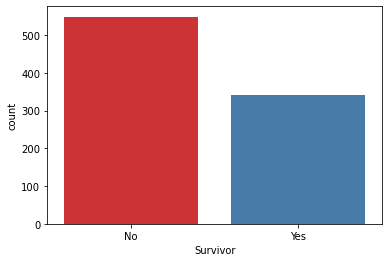

In [48]:
# view who survived and who did no survived
# countplot on 'survivor' column
sns.countplot('Survivor',data=titanic_df,palette='Set1')

From the look,quite a few more people did not survive the crash than those who survived.

So,we will now investigate which factors affected the survival rates?

Check if class was a factor

C:\Users\BEN KOLE\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


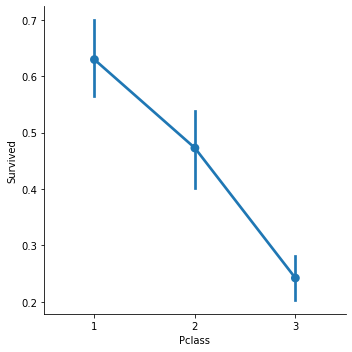

In [49]:
#do a factorplot
sns.factorplot('Pclass','Survived',data=titanic_df)

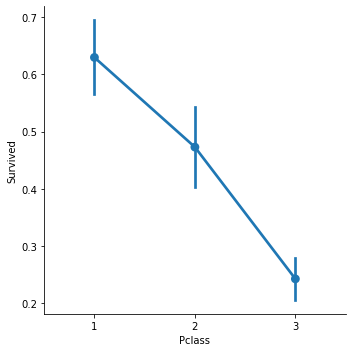

In [53]:
sns.catplot('Pclass','Survived',data=titanic_df,kind='point')

It looks the rate of surviving was very low at the 3rd class,and high at the 1st class.

From the previous plots,the 3rd class had more males on board than females and children.

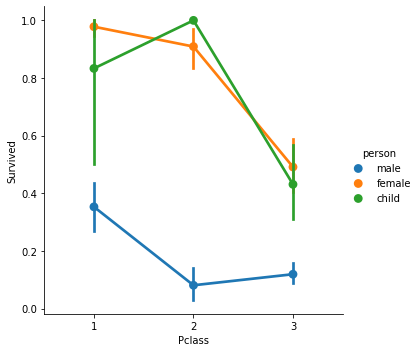

In [54]:
sns.catplot('Pclass','Survived',hue='person',data=titanic_df,kind='point')

From the above plot using this data, it looks like being a male or being in the 3rd class would not definately favor the survival of the passenger.

Even without considering the class, the result of being a male decreases the chances of one surviving.

Is age a factor?

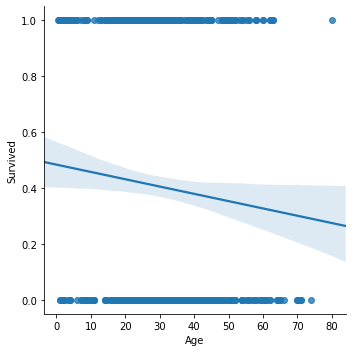

In [55]:
# linear plot on age vs survival
sns.lmplot(x='Age',y='Survived',data=titanic_df)

The general trend from this linear plot is that; the older the passenger was, the less likely they survived.

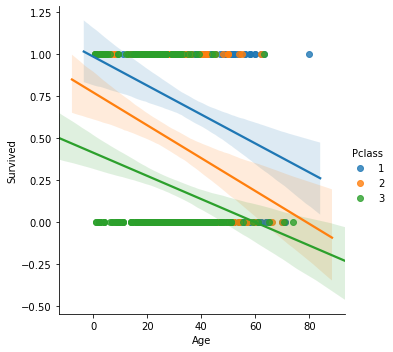

In [56]:
# use hue to see the effect of class and age
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df)

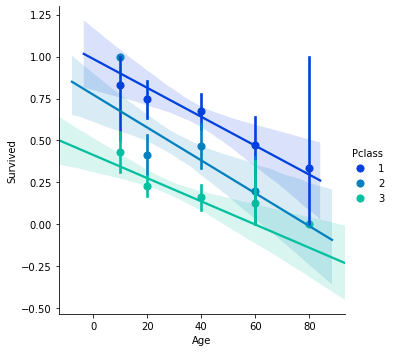

In [58]:
# use x_bins to reduce the data points being showed
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,x_bins=generations,palette='winter')

How did gender and age affect the survival?

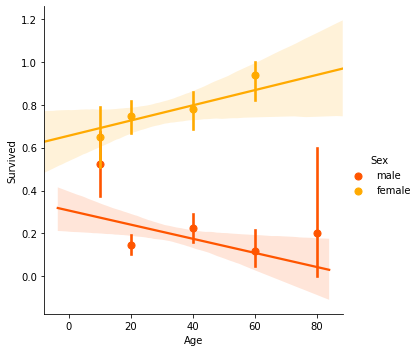

In [63]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations,palette='autumn')

It looks like, older females had more chances of surviving than older males.

On the reverse, if you were a younger male, you had more chances of surviving than a younger female.

Some more questions to answer on the Titanic dataset using data analysis skills:

1.) Did the deck have an effect on the passengers survival rate? Did this answer match up with your intuition?

2.) Did having a family member increase the odds of surviving the crash?

### End of Titanic Intro Project!!!